In [52]:
import numpy as np
import pandas as pd

In [53]:
churn = pd.read_csv('churn_data.csv'
                    , parse_dates=True)
churn.head()

,customer_id,date,transaction_amount,plan_type,churn,issuing_date
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01


In [54]:
customer_id_factor = pd.factorize(churn.customer_id)

churn['Customer_Id_No'] = customer_id_factor[0]

In [55]:
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0
...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99


In [56]:
churn.plan_type.value_counts()

plan_type
Basic       420
Standard    399
Premium     380
Name: count, dtype: int64

In [57]:
plant_type_factor =  pd.factorize(churn.plan_type)

churn['plan_type_id'] =  plant_type_factor[0]

In [58]:
churn.issuing_date.unique()

array(['2021-03-01', '2018-03-01', '2020-09-01', '2018-07-01',
       '2018-06-01', '2020-10-01', '2021-12-01', '2018-05-01',
       '2022-08-01', '2023-01-01', '2020-03-01', '2020-12-01',
       '2021-01-01', '2022-03-01', '2018-01-01', '2019-06-01',
       '2018-12-01', '2019-07-01', '2019-05-01', '2018-08-01',
       '2020-11-01', '2019-10-01', '2022-05-01', '2022-04-01',
       '2018-02-01', '2022-09-01', '2021-06-01', '2022-07-01',
       '2019-09-01', '2022-11-01', '2018-04-01', '2020-08-01',
       '2019-03-01', '2018-10-01', '2019-01-01', '2020-07-01',
       '2022-02-01', '2019-11-01', '2019-02-01', '2021-11-01',
       '2021-07-01', '2019-08-01', '2020-01-01', '2022-01-01',
       '2019-04-01', '2021-09-01', '2022-10-01', '2021-04-01',
       '2021-10-01', '2018-09-01', '2022-12-01', '2020-06-01',
       '2020-04-01'], dtype=object)

In [59]:
churn.groupby( ['customer_id', 'plan_type'] ).issuing_date.unique()

customer_id  plan_type
CUST_1       Basic        [2021-03-01]
             Premium      [2021-03-01]
             Standard     [2021-03-01]
CUST_10      Basic        [2022-08-01]
             Premium      [2022-08-01]
                              ...     
CUST_98      Premium      [2018-08-01]
             Standard     [2018-08-01]
CUST_99      Basic        [2020-04-01]
             Premium      [2020-04-01]
             Standard     [2020-04-01]
Name: issuing_date, Length: 296, dtype: object

In [60]:
churn.issuing_date = pd.to_datetime(churn.issuing_date)
churn.date = pd.to_datetime(churn.date)
churn['no_days'] = churn.date-churn.issuing_date 
churn['no_days'] = churn.no_days.apply(lambda x: x.days)
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791
...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853


In [61]:
def create_embeding(ids, embeding_dims = 8, random = False, prefix=None):
    rows = len(set(churn.Customer_Id_No))
    
    if random:
        matrix = np.random.normal( size=(rows, embeding_dims) )
    else:
        matrix = np.arange(0, rows*embeding_dims).reshape(rows,embeding_dims)

    
    if prefix is not None:
        columns=list(map(lambda x: prefix+'V_'+str(x), range(embeding_dims))) 
    else:
        columns=list(map(lambda x: 'V_'+str(x), range(embeding_dims))) 
    

    matrix = pd.DataFrame(matrix[ids]
                          , columns=columns)
    
    
    return matrix
    # return matrix

In [62]:
df_c_v = create_embeding(ids=churn.Customer_Id_No, prefix='Customer_')
df_c_v
df = pd.concat([churn, df_c_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,0,1,2,3,4,5,6,7
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,0,1,2,3,4,5,6,7
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,0,1,2,3,4,5,6,7
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,0,1,2,3,4,5,6,7
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,0,1,2,3,4,5,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,792,793,794,795,796,797,798,799
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,792,793,794,795,796,797,798,799
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,792,793,794,795,796,797,798,799
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,792,793,794,795,796,797,798,799


In [63]:
df_p_v = create_embeding(ids=churn.plan_type_id, prefix='Plan_Type_')
df_p_v
df = pd.concat([df, df_p_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,...,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,0,...,6,7,0,1,2,3,4,5,6,7
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,0,...,6,7,8,9,10,11,12,13,14,15
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,0,...,6,7,8,9,10,11,12,13,14,15
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,0,...,6,7,16,17,18,19,20,21,22,23
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,0,...,6,7,8,9,10,11,12,13,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,792,...,798,799,16,17,18,19,20,21,22,23
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,792,...,798,799,16,17,18,19,20,21,22,23
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,792,...,798,799,16,17,18,19,20,21,22,23
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,792,...,798,799,16,17,18,19,20,21,22,23


In [64]:
df = df.drop( 'customer_id date plan_type issuing_date no_days Customer_Id_No'.split(), axis=1 )
df

,transaction_amount,churn,plan_type_id,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,193.524658,0,0,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7
1,303.342657,0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2,38.460970,0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
3,356.955563,0,2,0,1,2,3,4,5,6,7,16,17,18,19,20,21,22,23
4,417.896894,0,1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.616717,0,2,792,793,794,795,796,797,798,799,16,17,18,19,20,21,22,23
1196,193.979775,0,2,792,793,794,795,796,797,798,799,16,17,18,19,20,21,22,23
1197,498.619353,0,2,792,793,794,795,796,797,798,799,16,17,18,19,20,21,22,23
1198,117.854550,0,2,792,793,794,795,796,797,798,799,16,17,18,19,20,21,22,23


In [69]:
df.isna().mean() 

transaction_amount    0.005833
churn                 0.000000
plan_type_id          0.000000
Customer_V_0          0.000000
Customer_V_1          0.000000
Customer_V_2          0.000000
Customer_V_3          0.000000
Customer_V_4          0.000000
Customer_V_5          0.000000
Customer_V_6          0.000000
Customer_V_7          0.000000
Plan_Type_V_0         0.000000
Plan_Type_V_1         0.000000
Plan_Type_V_2         0.000000
Plan_Type_V_3         0.000000
Plan_Type_V_4         0.000000
Plan_Type_V_5         0.000000
Plan_Type_V_6         0.000000
Plan_Type_V_7         0.000000
dtype: float64

In [71]:
df.churn.value_counts()

churn
0    863
1    337
Name: count, dtype: int64

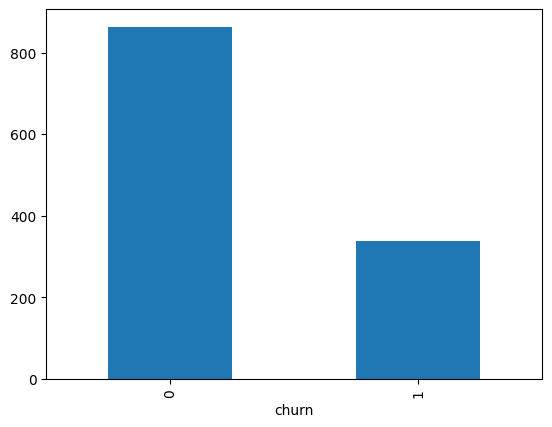

In [67]:
df.churn.value_counts().plot.bar();

<Axes: ylabel='Frequency'>

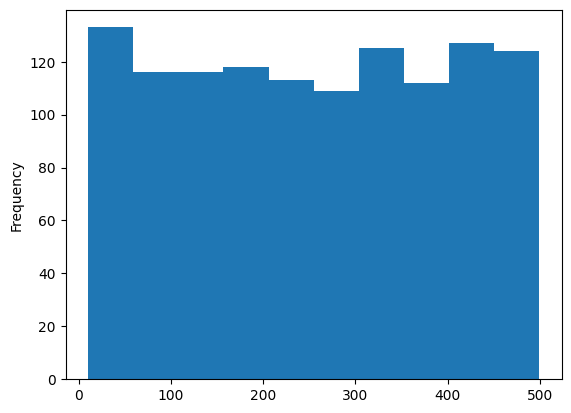

In [68]:
df.transaction_amount.plot.hist()